In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, SimpleRNN, Input, concatenate
from tensorflow.keras.optimizers import Adam

In [66]:
df = pd.read_csv('input_all_para23.csv')
df.head()


,Day Number,AUS(H),US(H),kestrel soft,S/C,US SC TRIAL,BENGA M,benga high ash,BENGA C,PDN\LVHR,...,GCM_temperature,charging_temperature,Battery_operation_temp,coking_time,coke_end_temp,push_force,PRI,coke_per_push,volume_of_water,Quenching_time
0,Day 1,28,20,0.0,0,10.0,0.0,0.0,0,0.0,...,312.82,876.52,32.47,19.02,1266.93,17.18,20.63,14.39,31.69,2.56
1,Day 2,28,20,0.0,0,12.0,0.0,0.0,0,0.0,...,345.67,870.75,33.84,19.86,1268.41,15.48,21.28,14.78,30.44,2.70
2,Day 3,31,20,0.0,0,12.0,0.0,0.0,0,0.0,...,348.29,871.04,34.34,19.29,1269.02,18.55,22.86,14.46,31.20,2.73
3,Day 4,24,15,0.0,0,10.0,0.0,0.0,0,10.0,...,348.81,882.41,32.08,18.46,1264.39,18.64,20.87,14.52,28.53,2.65
4,Day 5,21,13,0.0,0,11.0,0.0,0.0,0,12.0,...,329.59,882.77,32.51,21.88,1260.47,15.02,23.56,14.15,31.24,2.56


In [67]:
df = df.drop('Day Number', axis=1)

In [68]:
df

,AUS(H),US(H),kestrel soft,S/C,US SC TRIAL,BENGA M,benga high ash,BENGA C,PDN\LVHR,indonesia coal,...,GCM_temperature,charging_temperature,Battery_operation_temp,coking_time,coke_end_temp,push_force,PRI,coke_per_push,volume_of_water,Quenching_time
0,28,20,0.0,0,10.0,0.0,0.0,0,0.0,7.0,...,312.82,876.52,32.47,19.02,1266.93,17.18,20.63,14.39,31.69,2.56
1,28,20,0.0,0,12.0,0.0,0.0,0,0.0,6.0,...,345.67,870.75,33.84,19.86,1268.41,15.48,21.28,14.78,30.44,2.70
2,31,20,0.0,0,12.0,0.0,0.0,0,0.0,6.0,...,348.29,871.04,34.34,19.29,1269.02,18.55,22.86,14.46,31.20,2.73
3,24,15,0.0,0,10.0,0.0,0.0,0,10.0,5.0,...,348.81,882.41,32.08,18.46,1264.39,18.64,20.87,14.52,28.53,2.65
4,21,13,0.0,0,11.0,0.0,0.0,0,12.0,5.0,...,329.59,882.77,32.51,21.88,1260.47,15.02,23.56,14.15,31.24,2.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,34,10,0.0,6,0.0,0.0,0.0,9,10.0,0.0,...,329.22,881.39,34.51,19.65,1265.74,19.48,22.68,14.71,30.32,2.61
87,34,10,0.0,8,0.0,0.0,0.0,9,10.0,0.0,...,317.06,878.52,33.06,19.25,1261.79,15.35,20.76,14.41,28.66,2.67
88,34,10,0.0,0,0.0,0.0,0.0,9,10.0,0.0,...,307.44,871.63,33.06,18.44,1262.56,18.89,23.88,14.87,29.37,2.51
89,44,10,0.0,0,0.0,0.0,0.0,9,0.0,0.0,...,303.99,886.33,33.66,21.69,1263.62,18.93,24.79,14.78,31.85,2.57


In [69]:
df.fillna(0, inplace=True)

In [70]:
df.info()
# df.drop(columns=['0'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AUS(H)                         91 non-null     int64  
 1   US(H)                          91 non-null     int64  
 2   kestrel soft                   91 non-null     float64
 3   S/C                            91 non-null     int64  
 4   US SC TRIAL                    91 non-null     float64
 5   BENGA M                        91 non-null     float64
 6   benga high ash                 91 non-null     float64
 7   BENGA C                        91 non-null     int64  
 8   PDN\LVHR                       91 non-null     float64
 9   indonesia coal                 91 non-null     float64
 10  Canada                         91 non-null     float64
 11  kestrel soft coal              91 non-null     int64  
 12  PCC                            91 non-null     int64

In [71]:
X_percentages = df.iloc[:,0:14]
X_percentages.head()

,AUS(H),US(H),kestrel soft,S/C,US SC TRIAL,BENGA M,benga high ash,BENGA C,PDN\LVHR,indonesia coal,Canada,kestrel soft coal,PCC,MCC
0,28,20,0.0,0,10.0,0.0,0.0,0,0.0,7.0,6.0,10,12,7
1,28,20,0.0,0,12.0,0.0,0.0,0,0.0,6.0,7.0,8,12,7
2,31,20,0.0,0,12.0,0.0,0.0,0,0.0,6.0,7.0,8,12,4
3,24,15,0.0,0,10.0,0.0,0.0,0,10.0,5.0,10.0,10,10,6
4,21,13,0.0,0,11.0,0.0,0.0,0,12.0,5.0,10.0,11,11,6


In [72]:
X_percentages = X_percentages.drop('BENGA M', axis=1)

In [73]:
X_percentages = X_percentages.drop('benga high ash', axis=1)

In [74]:
X_percentages

,AUS(H),US(H),kestrel soft,S/C,US SC TRIAL,BENGA C,PDN\LVHR,indonesia coal,Canada,kestrel soft coal,PCC,MCC
0,28,20,0.0,0,10.0,0,0.0,7.0,6.0,10,12,7
1,28,20,0.0,0,12.0,0,0.0,6.0,7.0,8,12,7
2,31,20,0.0,0,12.0,0,0.0,6.0,7.0,8,12,4
3,24,15,0.0,0,10.0,0,10.0,5.0,10.0,10,10,6
4,21,13,0.0,0,11.0,0,12.0,5.0,10.0,11,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...
86,34,10,0.0,6,0.0,9,10.0,0.0,0.0,12,15,4
87,34,10,0.0,8,0.0,9,10.0,0.0,0.0,10,15,4
88,34,10,0.0,0,0.0,9,10.0,0.0,0.0,18,15,4
89,44,10,0.0,0,0.0,9,0.0,0.0,0.0,18,15,4


In [75]:
r=pd.read_csv('input_features23.csv')
r

,0,Ash%,VM%,Moisture%,HGI Index,Vitrinite content,MMR Index,Fluidity,CSN,Softening temperature,Resilidification temperature,Range degc,Sulphur
0,AUS(H),10.04,22.27,9.08,0,0,0,750,0,417,495,78,0.51
1,USA(H),8.59,26.09,10.30,0,0,0,1230,0,395,491,96,0.94
2,USA(SOFT),7.94,33.38,9.13,0,0,0,4554,0,0,0,0,0.93
3,BENGA,13.57,24.83,9.11,0,0,0,1537,0,0,0,0,0.60
4,LVHR,10.74,20.35,9.01,0,0,0,371,0,0,0,0,0.88
5,INDONESIA,12.89,25.23,9.45,0,0,0,441,0,415,488,73,0.82
6,KESRTRAL SOFT,8.98,25.98,9.19,0,0,0,1164,0,0,0,0,0.93
7,RUSSIAN SOFT,10.07,32.98,10.10,0,0,0,2450,0,390,471,81,0.87
8,MOONIDIH,18.50,25.20,9.50,0,0,0,100,0,448,499,51,0.50
9,JAMBADOBA,18.76,27.40,9.20,0,0,0,102,0,423,478,55,0.50


In [76]:
r = r.set_index(r.columns[0])
r.columns = range(len(r.columns))


In [77]:
r.index = range(len(r))


In [78]:
r.shape

(12, 12)

In [79]:
# Create an empty DataFrame mk with the same rows as X_percentages and columns as r
mk = pd.DataFrame(index=X_percentages.index, columns=r.columns)

In [80]:
mk

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
X_percentages = X_percentages.astype(float)  # or int, depending on your data
r = r.astype(float)

In [82]:



for i, row_X in X_percentages.iterrows():
    # Iterate over columns of r
    for col_name in r.columns:
        # Select the column from r
        col_r = r[col_name].values  # Convert to NumPy array for element-wise multiplication

        # Print intermediate values for debugging
        # print(f"row_X: {row_X}")
        # print(f"col_r: {col_r}")

        # Calculate element-wise product and sum using NumPy
        mk.at[i, col_name] = np.sum(row_X.values * col_r)

        
mk

,0,1,2,3,4,5,6,7,8,9,10,11
0,1451.52,2501.27,933.86,0.0,0.0,0.0,69072.0,0.0,37056.0,43575.0,6519.0,65.47
1,1443.91,2479.39,932.88,0.0,0.0,0.0,67260.0,0.0,36268.0,42647.0,6379.0,65.86
2,1391.8,2465.29,933.42,0.0,0.0,0.0,69342.0,0.0,36271.0,42716.0,6445.0,65.89
3,1429.62,2498.15,929.92,0.0,0.0,0.0,66906.0,0.0,33189.0,38802.0,5613.0,66.79
4,1457.3,2504.5,927.13,0.0,0.0,0.0,65047.0,0.0,31981.0,37273.0,5292.0,67.12
...,...,...,...,...,...,...,...,...,...,...,...,...
86,1462.05,2475.06,916.23,0.0,0.0,0.0,64829.0,0.0,34753.0,40656.0,5903.0,62.52
87,1451.67,2469.92,916.05,0.0,0.0,0.0,67699.0,0.0,33907.0,39700.0,5793.0,62.72
88,1493.19,2490.48,916.77,0.0,0.0,0.0,56219.0,0.0,37291.0,43524.0,6233.0,61.92
89,1503.79,2453.38,915.67,0.0,0.0,0.0,52079.0,0.0,41461.0,48474.0,7013.0,57.72


In [83]:
mk.shape

(91, 12)

In [84]:

X_sequences = df.iloc[:,14:30]
X_sequences.head()

,crushing_size,percentage_of_moisture,bulk_density,blend_coal_quality_parameters,GCM_pressure,GCM_temperature,charging_temperature,Battery_operation_temp,coking_time,coke_end_temp,push_force,PRI,coke_per_push,volume_of_water,Quenching_time
0,10.83,10.76,0.82,46.55,236.29,312.82,876.52,32.47,19.02,1266.93,17.18,20.63,14.39,31.69,2.56
1,10.37,10.49,0.81,45.74,212.27,345.67,870.75,33.84,19.86,1268.41,15.48,21.28,14.78,30.44,2.70
2,10.23,10.18,0.81,44.29,206.65,348.29,871.04,34.34,19.29,1269.02,18.55,22.86,14.46,31.20,2.73
3,10.62,10.36,0.84,44.36,224.39,348.81,882.41,32.08,18.46,1264.39,18.64,20.87,14.52,28.53,2.65
4,10.82,10.82,0.82,44.67,222.54,329.59,882.77,32.51,21.88,1260.47,15.02,23.56,14.15,31.24,2.56


In [85]:
X_sequences.shape

(91, 15)

In [86]:
percentage_columns = mk
sequential_data =X_sequences

In [87]:
scaler_per = MinMaxScaler()
percentage_columns = scaler_per.fit_transform(percentage_columns)

scaler_seq = MinMaxScaler()
seq_columns = scaler_seq.fit_transform(sequential_data)

In [88]:
seq_columns

array([[0.83505155, 0.75531915, 0.25      , ..., 0.38383838, 0.93157895,
        0.2       ],
       [0.36082474, 0.46808511, 0.        , ..., 0.77777778, 0.60263158,
        0.66666667],
       [0.21649485, 0.13829787, 0.        , ..., 0.45454545, 0.80263158,
        0.76666667],
       ...,
       [0.63917526, 0.26595745, 0.25      , ..., 0.86868687, 0.32105263,
        0.03333333],
       [0.62886598, 0.77659574, 0.25      , ..., 0.77777778, 0.97368421,
        0.23333333],
       [0.35051546, 0.22340426, 0.75      , ..., 0.80808081, 0.95526316,
        0.2       ]])

In [89]:
Y = pd.read_csv('output23.csv')
# columndrop='Unnamed: 0'
# print(Y.Unamed)
print(Y.shape)
# scaler_y = MinMaxScaler()
# Y = scaler_y.fit_transform(Y)


(91, 10)


In [90]:
Y

,Days Number,Ash,VM,Moisture,80,-25,CSR,CRI,M40,M10
0,Day 1,15.47,0.80,6.47,10.0,5.6,64.282,22.457,79.10,7.95
1,Day 2,15.43,0.77,6.67,9.2,5.2,65.380,22.650,79.40,7.70
2,Day 3,15.37,0.80,6.17,9.2,6.0,64.732,22.451,78.70,8.30
3,Day 4,15.37,0.80,5.77,9.0,6.9,65.041,22.679,79.15,8.55
4,Day 5,15.47,0.77,5.77,9.4,6.9,65.817,22.172,78.75,8.95
...,...,...,...,...,...,...,...,...,...,...
86,Day 87,15.53,0.80,4.63,9.4,6.4,65.521,22.545,78.90,8.25
87,Day 88,15.40,0.80,4.77,8.7,7.0,64.040,22.498,78.90,8.60
88,Day 89,15.47,0.80,5.50,9.0,7.4,65.543,22.280,79.05,8.85
89,Day 90,15.50,0.77,4.80,9.4,6.0,64.412,22.495,78.90,8.45


In [91]:
Y = Y.drop('Days Number', axis=1)

In [92]:
Y

,Ash,VM,Moisture,80,-25,CSR,CRI,M40,M10
0,15.47,0.80,6.47,10.0,5.6,64.282,22.457,79.10,7.95
1,15.43,0.77,6.67,9.2,5.2,65.380,22.650,79.40,7.70
2,15.37,0.80,6.17,9.2,6.0,64.732,22.451,78.70,8.30
3,15.37,0.80,5.77,9.0,6.9,65.041,22.679,79.15,8.55
4,15.47,0.77,5.77,9.4,6.9,65.817,22.172,78.75,8.95
...,...,...,...,...,...,...,...,...,...
86,15.53,0.80,4.63,9.4,6.4,65.521,22.545,78.90,8.25
87,15.40,0.80,4.77,8.7,7.0,64.040,22.498,78.90,8.60
88,15.47,0.80,5.50,9.0,7.4,65.543,22.280,79.05,8.85
89,15.50,0.77,4.80,9.4,6.0,64.412,22.495,78.90,8.45


In [93]:
# Y.loc[:, 'CSR'] = np.random.uniform(64, 66, size=len(Y))
# Y['CSR'] = Y['CSR'].round(3)
# Y.loc[:, 'CRI'] = np.random.uniform(22, 23, size=len(Y))
# Y['CRI'] = Y['CRI'].round(3)

In [94]:
# scaler_y = MinMaxScaler()
# y= scaler_y.fit_transform(Y)

In [95]:
y = np.array(Y)


In [96]:
X_percentage_train, X_percentage_test, X_seq_train, X_seq_test, y_train, y_test = train_test_split(
    percentage_columns, seq_columns, y, test_size=0.2, random_state=42
)

In [97]:
X_percentage_train.shape

(72, 12)

In [98]:
X_seq_train.shape

(72, 15)

In [99]:
from keras.layers import Input, Dense, SimpleRNN, GRU,  concatenate, Reshape
from keras.models import Model
from keras.optimizers import Adam

percentage_input = Input(shape=(12,))
sequential_input = Input(shape=(15,))

# Dense layer for percentage_input
x = Dense(128, activation='relu')(percentage_input)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='relu')(x)

# Reshape sequential_input to include the batch_size and time dimension
input_percentage = Reshape((15, 1))(sequential_input)
# Reshape x to have the same number of dimensions as reshaped_sequential_input
x_reshaped = Reshape((1, 1))(x)
# Concatenate the outputs of Dense and reshaped_sequential_input before passing to RNN
combined = concatenate([x_reshaped, input_percentage],axis=1)


from keras.layers import Lambda

# combined = Lambda(reverse_order)(combined)
yhat = SimpleRNN(128, activation='relu', return_sequences=False)(combined)
yhat = Dense(64, activation='relu')(yhat)
yhat=Dense(64, activation='relu')(yhat)
yhat = Dense(9, activation='linear')(yhat)  # 9 for the output layer

model = Model(inputs=[percentage_input, sequential_input], outputs=yhat)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 128)          1664        ['input_3[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 64)           8256        ['dense_6[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 1)            65          ['dense_7[0][0]']                
                                                                                            

In [100]:
history = model.fit([X_percentage_train, X_seq_train], y_train, epochs=50, batch_size=32, validation_data=([X_percentage_test, X_seq_test], y_test), verbose=0)

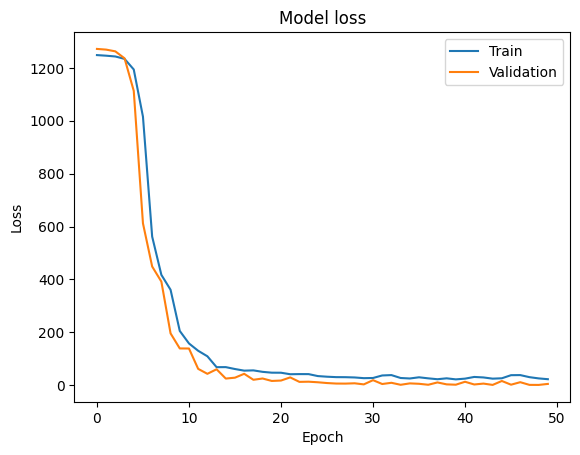

In [101]:
# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'])
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


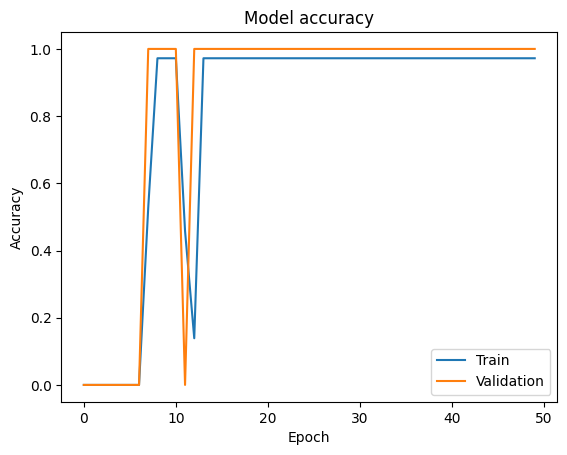

In [102]:
# plt.plot(history.history['accuracy'])


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


Error check in train data

In [103]:
import numpy as np
import pandas as pd

# Assuming X_percentage_train and X_seq_train are already defined

# Initialize an empty list to store the predictions
predictions_list = []

# Assuming scaler_per and scaler_seq are already defined
# Assuming model is already defined

for i in range(len(X_percentage_train)):  # Corrected the range to include 91 rows
    data1 = np.array(X_percentage_train[i, :]).reshape(1,-1)  # Assuming X_percentage_train is a 2D array
    data2 = np.array(X_seq_train[i, :]).reshape(1,-1)         # Assuming X_seq_train is a 2D array
    # print(data1)
    # print(data2)
    # # Assuming scaler_per and scaler_seq are instances of StandardScaler
    # data1 = scaler_per.transform(data1.reshape(1,-1))
    # data2 = scaler_seq.transform(data2.reshape(1,-1))

    y_pred = model.predict([data1, data2])
    # print(y_pred)
    # Append the predictions to the list
    predictions_list.append(y_pred.flatten())
    

# Create a DataFrame from the list of predictions
y_output = pd.DataFrame(predictions_list, columns=[f'{i }' for i in range(predictions_list[0].shape[0])])

# Now y_output contains the predictions for each row in X_percentage_train and X_seq_train
y_output=y_output.round(2)
y_output

1/1 [==============================] - 0s 47ms/step


,0,1,2,3,4,5,6,7,8
0,14.60,0.79,5.23,8.60,5.75,63.299999,21.879999,75.000000,8.27
1,14.38,0.77,5.15,8.47,5.67,62.369999,21.559999,73.919998,8.17
2,14.51,0.80,5.19,8.56,5.71,62.900002,21.750000,74.550003,8.21
3,14.99,0.79,5.37,8.82,5.92,65.010002,22.490000,77.019997,8.51
4,14.53,0.77,5.20,8.56,5.74,62.970001,21.780001,74.620003,8.25
...,...,...,...,...,...,...,...,...,...
67,13.91,0.77,4.97,8.21,5.46,60.209999,20.820000,71.430000,7.85
68,14.65,0.79,5.24,8.62,5.77,63.459999,21.930000,75.269997,8.31
69,14.54,0.82,5.20,8.58,5.71,62.939999,21.750000,74.669998,8.22
70,14.96,0.82,5.36,8.81,5.89,64.699997,22.360001,76.769997,8.47


In [104]:
y_train_2 = pd.DataFrame(y_train, columns=[
    '0', '1', '2', '3', '4', '5', '6', '7', '8'
])

In [105]:
actual_output_train = pd.DataFrame(y_train_2)
predicted_output_train = pd.DataFrame(y_output)

y_train_2_list = [y_train_2[col].to_numpy() for col in y_train_2.columns]
y_output_list = [y_output[col].to_numpy() for col in y_output.columns]

# Perform the operation and create a new list of arrays
result_list = []

for i in range(len(y_train_2_list)):
    result_list.append(((y_train_2_list[i] - y_output_list[i])*100 / y_train_2_list[i]).round(2))

# Convert the result list of arrays back to a DataFrame
result_df = pd.DataFrame({col: result_list[i] for i, col in enumerate(y_train_2.columns)})

frames=[]
for i in range(len(actual_output_train)):
    current_row_df = pd.DataFrame({'Actual': actual_output_train.iloc[i], 
                                    'Predicted': predicted_output_train.iloc[i], 
                                    'Error': result_df.iloc[i]}).transpose()
    frames.append(current_row_df)

# Concatenate the list of DataFrames into the final DataFrame
train_error_file = pd.concat(frames, ignore_index=True)
new_columns = {'0': 'Ash', '1': 'VM','2':'Moisture', '3': '80','4':	'-25','5':'CSR'	,'6': 'CRI','7': 'M40','8':'M10'}
train_error_file.rename(columns=new_columns, inplace=True)
train_error_file = train_error_file.transpose()
column_mapping = {}
for i in range(280):
    day_number = (i // 3) + 1 
    if(i%3==0) :column_mapping[i]=f'day {day_number} Actual'
    elif(i%3==1) :column_mapping[i]=f'day {day_number} Predicted'
    else: column_mapping[i]=f' day {day_number} Error'

train_error_file.rename(columns=column_mapping, inplace=True)
# train_error_file.to_excel('Train_Output.xlsx')

C:\Users\kunal\AppData\Local\Temp\ipykernel_15540\2672434005.py:11: RuntimeWarning: divide by zero encountered in divide
  result_list.append(((y_train_2_list[i] - y_output_list[i])*100 / y_train_2_list[i]).round(2))


In [106]:
train_error_file

,day 1 Actual,day 1 Predicted,day 1 Error,day 2 Actual,day 2 Predicted,day 2 Error,day 3 Actual,day 3 Predicted,day 3 Error,day 4 Actual,...,day 69 Error,day 70 Actual,day 70 Predicted,day 70 Error,day 71 Actual,day 71 Predicted,day 71 Error,day 72 Actual,day 72 Predicted,day 72 Error
Ash,15.630,14.600000,6.59,15.500,14.380000,7.23,15.300,14.510000,5.16,15.500,...,-inf,15.470,14.540000,6.01,15.500,14.960000,3.48,15.500,14.420000,6.97
VM,0.800,0.790000,1.25,0.730,0.770000,-5.48,0.770,0.800000,-3.90,0.700,...,-inf,0.830,0.820000,1.20,0.800,0.820000,-2.50,0.770,0.770000,0.00
Moisture,5.270,5.230000,0.76,5.230,5.150000,1.53,5.430,5.190000,4.42,5.070,...,-inf,4.600,5.200000,-13.04,6.300,5.360000,14.92,5.730,5.170000,9.77
80,10.000,8.600000,14.00,9.400,8.470000,9.89,9.800,8.560000,12.65,11.000,...,-inf,10.200,8.580000,15.88,10.000,8.810000,11.90,9.800,8.480000,13.47
-25,6.000,5.750000,4.17,6.000,5.670000,5.50,7.000,5.710000,18.43,7.200,...,-inf,5.900,5.710000,3.22,5.900,5.890000,0.17,6.500,5.680000,12.62
CSR,64.705,63.299999,2.17,65.081,62.369999,4.17,65.600,62.900002,4.12,64.940,...,2.87,64.670,62.939999,2.68,65.877,64.699997,1.79,65.001,62.470001,3.89
CRI,22.474,21.879999,2.64,22.895,21.559999,5.83,22.477,21.750000,3.23,22.565,...,2.06,22.551,21.750000,3.55,22.793,22.360001,1.90,22.804,21.580000,5.37
M40,79.400,75.000000,5.54,78.300,73.919998,5.59,78.550,74.550003,5.09,78.700,...,-inf,78.950,74.669998,5.42,78.700,76.769997,2.45,78.750,74.059998,5.96
M10,8.750,8.270000,5.49,8.400,8.170000,2.74,8.400,8.210000,2.26,8.600,...,-inf,8.600,8.220000,4.42,8.050,8.470000,-5.22,8.650,8.180000,5.43


In [107]:
# train_error_file.transpose()


In [108]:
file_path = 'train_error_file.csv'
train_error_file.to_csv(file_path, index=False)

Error Check In Test Data

In [109]:
import numpy as np
import pandas as pd

# Assuming X_percentage_train and X_seq_train are already defined

# Initialize an empty list to store the predictions
predictions_list = []

# Assuming scaler_per and scaler_seq are already defined
# Assuming model is already defined

for i in range(len(X_percentage_test)):  # Corrected the range to include 91 rows
    data1 = np.array(X_percentage_test[i, :]).reshape(1,-1)  # Assuming X_percentage_train is a 2D array
    data2 = np.array(X_seq_test[i, :]).reshape(1,-1)         # Assuming X_seq_train is a 2D array
    # print(data1)
    # print(data2)
    # # Assuming scaler_per and scaler_seq are instances of StandardScaler
    # data1 = scaler_per.transform(data1.reshape(1,-1))
    # data2 = scaler_seq.transform(data2.reshape(1,-1))

    y_pred = model.predict([data1, data2])
    # print(y_pred)
    # Append the predictions to the list
    predictions_list.append(y_pred.flatten())
    

# Create a DataFrame from the list of predictions
y_output = pd.DataFrame(predictions_list, columns=[f'{i}' for i in range(predictions_list[0].shape[0])])

# Now y_output contains the predictions for each row in X_percentage_train and X_seq_train
y_output=y_output.round(2)

1/1 [==============================] - 0s 51ms/step


In [110]:
y_test_2 = pd.DataFrame(y_test, columns=[
    '0', '1', '2', '3', '4', '5', '6', '7', '8'
])

In [111]:
y_test_2

,0,1,2,3,4,5,6,7,8
0,15.37,0.83,5.57,9.6,6.0,65.650,22.202,78.85,8.40
1,15.47,0.80,6.00,9.6,7.6,65.387,22.854,78.10,8.90
2,15.63,0.77,5.00,9.0,7.3,65.049,22.860,78.30,8.95
3,15.47,0.80,5.50,9.0,7.4,65.543,22.280,79.05,8.85
4,15.47,0.80,6.47,10.0,5.6,64.282,22.457,79.10,7.95
5,15.60,0.77,5.80,9.0,7.4,65.932,22.141,78.55,8.60
6,15.60,0.80,5.77,10.0,6.8,64.795,22.768,78.35,8.70
7,15.47,0.80,5.13,9.8,5.5,65.392,22.743,78.80,8.30
8,15.40,0.77,5.97,9.8,6.5,65.133,22.813,78.55,8.95
9,15.47,0.73,4.70,10.5,5.0,65.954,22.272,78.80,8.65


In [112]:
# y_test_2 = pd.DataFrame(y_test)
# columns={'y1': '0', 'y2':'1', 'y3':'2','y4': '3', 'y5':'4', 'y6':'5','y7':'6', 'y8':'7','y9':'8'}


# y_output.rename(columns=columns, inplace=True)
# # print(y_test_2.shape)
# # y_output
# y_test_2
# y_output

In [113]:
actual_output_train = pd.DataFrame(y_test_2)
predicted_output_train = pd.DataFrame(y_output)

y_train_2_list = [y_test_2[col].to_numpy() for col in y_test_2.columns]
y_output_list = [y_output[col].to_numpy() for col in y_output.columns]

# Perform the operation and create a new list of arrays
result_list = []

for i in range(len(y_train_2_list)):
    result_list.append(((y_train_2_list[i] - y_output_list[i])*100 / y_train_2_list[i]).round(2))

# Convert the result list of arrays back to a DataFrame
result_df = pd.DataFrame({col: result_list[i] for i, col in enumerate(y_train_2.columns)})

frames=[]
for i in range(len(actual_output_train)):
    current_row_df = pd.DataFrame({'Actual': actual_output_train.iloc[i], 
                                    'Predicted': predicted_output_train.iloc[i], 
                                    'Error': result_df.iloc[i]}).transpose()
    frames.append(current_row_df)

# Concatenate the list of DataFrames into the final DataFrame
train_error_file = pd.concat(frames, ignore_index=True)
new_columns = {'0': 'Ash', '1': 'VM','2':'Moisture', '3': '80','4':	'-25','5':'CSR'	,'6': 'CRI','7': 'M40','8':'M10'}
train_error_file.rename(columns=new_columns, inplace=True)
train_error_file = train_error_file.transpose()
column_mapping = {}
for i in range(280):
    day_number = (i // 3) + 1 
    if(i%3==0) :column_mapping[i]=f'day {day_number} Actual'
    elif(i%3==1) :column_mapping[i]=f'day {day_number} Predicted'
    else: column_mapping[i]=f' day {day_number} Error'

train_error_file.rename(columns=column_mapping, inplace=True)
# train_error_file.to_excel('Train_Output.xlsx')
train_error_file

,day 1 Actual,day 1 Predicted,day 1 Error,day 2 Actual,day 2 Predicted,day 2 Error,day 3 Actual,day 3 Predicted,day 3 Error,day 4 Actual,...,day 16 Error,day 17 Actual,day 17 Predicted,day 17 Error,day 18 Actual,day 18 Predicted,day 18 Error,day 19 Actual,day 19 Predicted,day 19 Error
Ash,15.370,14.140000,8.00,15.470,14.460000,6.53,15.630,14.620000,6.46,15.470,...,6.66,15.630,14.620000,6.46,15.370,14.820000,3.58,15.600,14.510000,6.99
VM,0.830,0.690000,16.87,0.800,0.800000,-0.00,0.770,0.790000,-2.60,0.800,...,-7.79,0.700,0.850000,-21.43,0.770,0.840000,-9.09,0.730,0.760000,-4.11
Moisture,5.570,5.060000,9.16,6.000,5.180000,13.67,5.000,5.220000,-4.40,5.500,...,10.40,6.100,5.210000,14.59,5.730,5.280000,7.85,5.670,5.190000,8.47
80,9.600,8.290000,13.65,9.600,8.550000,10.94,9.000,8.620000,4.22,9.000,...,9.04,9.400,8.650000,7.98,9.900,8.770000,11.41,8.200,8.550000,-4.27
-25,6.000,5.580000,7.00,7.600,5.710000,24.87,7.300,5.740000,21.37,7.400,...,17.83,5.300,5.730000,-8.11,6.000,5.810000,3.17,7.200,5.720000,20.56
CSR,65.650,61.189999,6.79,65.387,62.750000,4.03,65.049,63.139999,2.93,65.543,...,5.15,64.774,63.299999,2.28,64.808,64.120003,1.06,64.467,62.880001,2.46
CRI,22.202,21.120001,4.87,22.854,21.700001,5.05,22.860,21.820000,4.55,22.280,...,2.49,22.080,21.900000,0.82,22.362,22.160000,0.90,22.653,21.730000,4.07
M40,78.850,72.529999,8.02,78.100,74.349998,4.80,78.300,74.879997,4.37,79.050,...,6.03,79.850,75.120003,5.92,78.650,76.050003,3.31,79.100,74.510002,5.80
M10,8.400,8.020000,4.52,8.900,8.200000,7.87,8.950,8.240000,7.93,8.850,...,9.39,8.150,8.230000,-0.98,8.550,8.320000,2.69,7.950,8.210000,-3.27


In [114]:
# train_error_file=train_error_file.transpose().round(2)

In [115]:
file_path = 'test_error_file.csv'
train_error_file.to_csv(file_path, index=True)

In [116]:
# for rows number i in renge 0 to 91
data1 = np.array([[1136., 1964., 754., 0., 0., 0.,50884., 0., 29157., 34506., 5349., 53.38]])
data2 = np.array([[10.83, 10.76, 0.82, 46.55,236.29,312.82,876.52,32.47,19.02,1266.93,17.18,20.63,14.39, 31.0, 2.56 ]])
data1 = scaler_per.transform(data1)
data2 = scaler_seq.transform(data2)
y_pred = (model.predict([data1, data2]))
print(y_pred.round(1))


1/1 [==============================] - 0s 49ms/step
[[14.3  0.8  5.1  8.5  5.6 62.  21.4 73.5  8. ]]


C:\Users\kunal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
